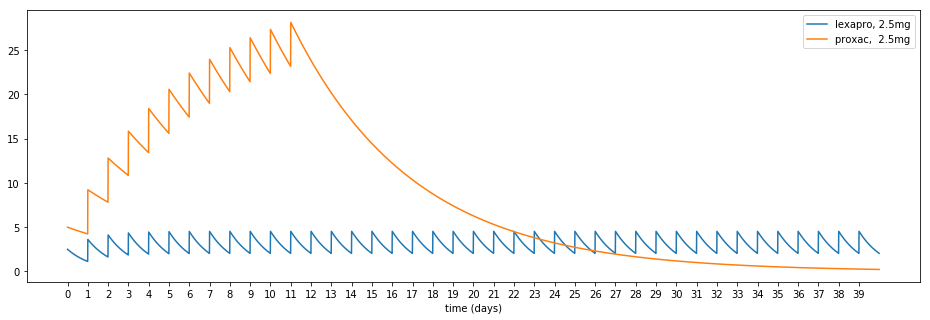

In [14]:
#makes a plot of the amount of drug in a persons body, assuming they take the amount 'dose' each day
#and that the drug is eliminated in an exponential decay with half-life 'halflife'
#Dan Elton, 2016
#%%  
import matplotlib.pyplot as plt
from numpy import *

def drug_conc(halflife = 30, #halflife in hours
              dose = 2.5, #dose in mgs/day
              time = 30,   #time to simulate in days
              res = 10, #resolution in minutes
              dayoflast = 1000):

    ptsperhour = int(60/res)
    npts = time*24*ptsperhour

    times = zeros(npts)
    c = zeros(npts)
    running_avg = zeros(npts)

    c[0] = dose #initial concentration from first dose
    runnint_avg = dose
    decay = 1.0/(halflife) #decay constant

    for t in range(1,npts):
        c[t] = c[t-1] - decay*c[t-1]*(1.0/ptsperhour)

        if ((t%(24*ptsperhour) == 0) & (t/(24*ptsperhour) < dayoflast))  :
            c[t] += dose

        running_avg[t] = (running_avg[t-1]*(t-1) + c[t])/t
        times[t] = (1.0/ptsperhour)*t

    return times, c

time = 40

times_1, c_1 = drug_conc(time=time)
times_2, c_2 = drug_conc(halflife = 24*6, time=time, dayoflast=12, dose=5)


plt.figure(figsize=(16,5))
plt.clf()
plt.plot(times_1/24, c_1, label='lexapro, 2.5mg')
plt.plot(times_1/24, c_2, label='proxac,  2.5mg')
plt.legend()
plt.title("")
plt.xlabel("time (days)")
plt.xticks(range(time))

plt.show()
